# Boston 주택 가격 예측 프로젝트

In [2]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [3]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

65536/57026 [==================================] - 0s 0us/step
404
102


In [4]:
# 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
train = train_data - train_data.mean(axis=0)

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
train = train / train_data.std(axis=0)

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test = (test_data - test_data.mean(axis=0)) / test_data.std(axis=0)

In [5]:
print(train.mean(axis=0), train.std(axis=0))
print(test.mean(axis=0), test.std(axis=0))

[-1.01541438e-16  1.09923072e-17  1.74337992e-15 -1.26686340e-16
 -5.25377321e-15  6.41414864e-15  2.98441140e-16  4.94653823e-16
  1.12671149e-17 -1.98136337e-16  2.36686358e-14  5.95679996e-15
  6.13920356e-16] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[-1.37417311e-16 -1.08845395e-17 -5.35519341e-16 -2.44902138e-17
  6.46541644e-16 -1.55812182e-15  1.82860263e-16  1.95921710e-17
 -1.74152631e-17 -4.08170230e-18 -3.91190348e-15 -3.20440842e-15
  8.71851611e-16] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [6]:
# 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
# 모델 구성
boston_model = models.Sequential()
boston_model.add(layers.Dense(128, input_shape=(train_data.shape[1],)))
boston_model.add(layers.BatchNormalization())
boston_model.add(layers.Activation('relu'))
boston_model.add(layers.Dense(64))
boston_model.add(layers.BatchNormalization())
boston_model.add(layers.Activation('relu'))
boston_model.add(layers.Dense(64))
boston_model.add(layers.BatchNormalization())
boston_model.add(layers.Activation('relu'))
boston_model.add(layers.Dense(1))

boston_model.compile(loss='mse',
                    optimizer='adam',
                    metrics=['mae'])

In [7]:
from tensorflow.keras import callbacks
# 예측을 위한 딥러닝 모델을 학습합니다.
check_point_cb = callbacks.ModelCheckpoint('keras_boston_model.h5', save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, monitor='val_loss',
                                  restore_best_weights=True)
history = boston_model.fit(train, train_labels, epochs=30,
                    validation_split=0.2, batch_size=64, verbose=1, 
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/30
6/6 [==============================] - 12s 39ms/step - loss: 560.7797 - mae: 21.9524 - val_loss: 637.6655 - val_mae: 23.5694
Epoch 2/30
6/6 [==============================] - 0s 8ms/step - loss: 536.3825 - mae: 21.7097 - val_loss: 631.1580 - val_mae: 23.4851
Epoch 3/30
6/6 [==============================] - 0s 8ms/step - loss: 519.9234 - mae: 21.4748 - val_loss: 624.5027 - val_mae: 23.3907
Epoch 4/30
6/6 [==============================] - 0s 7ms/step - loss: 505.8561 - mae: 21.2479 - val_loss: 617.9992 - val_mae: 23.2927
Epoch 5/30
6/6 [==============================] - 0s 8ms/step - loss: 494.7314 - mae: 21.0519 - val_loss: 610.3914 - val_mae: 23.1769
Epoch 6/30
6/6 [==============================] - 0s 7ms/step - loss: 480.7640 - mae: 20.8198 - val_loss: 601.4996 - val_mae: 23.0359
Epoch 7/30
6/6 [==============================] - 0s 7ms/step - loss: 469.8220 - mae: 20.6165 - val_loss: 592.5726 - val_mae: 22.8852
Epoch 8/30
6/6 [==============================] - 0s 7ms/ste

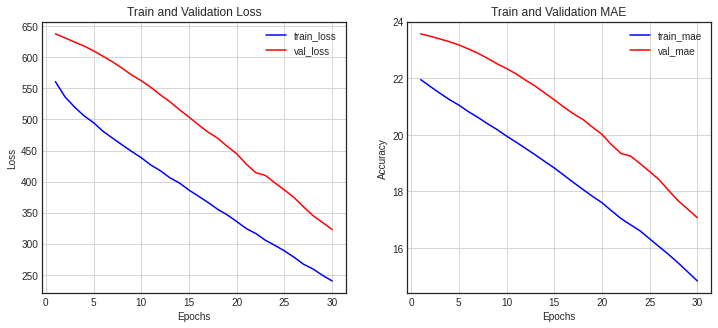

In [8]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [9]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
# [[YOUR CODE]]
test_loss, test_mae = boston_model.evaluate(test_data, test_labels)

# 결과 출력
print(f'Test Loss: {test_loss}')
print(f'Test MAE: {test_mae}')

4/4 [==============================] - 0s 2ms/step - loss: 396847.8125 - mae: 597.7798
Test Loss: 396847.8125
Test MAE: 597.77978515625


# Reuters 데이터 분류 프로젝트

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [12]:
# reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
# reuters 데이터셋 로드
(full_train_data, full_train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# 데이터 분리 (훈련 데이터와 검증 데이터)
train_data, val_data, train_labels, val_labels = train_test_split(full_train_data, 
                                                                full_train_labels,
                                                                    test_size=0.25,
                                                                    random_state=123)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

2121728/2110848 [==============================] - 0s 0us/step
6736
2246
2246
46


In [13]:
from tensorflow.keras import utils

# 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
    results = np.zeros((len(data), dim))
    for i, sequence in enumerate(data):
        results[i, sequence] = 1.0
    return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
# 레이블 데이터 범주형 형태로 변환
y_train = utils.to_categorical(train_labels)
y_val = utils.to_categorical(val_labels)
y_test = utils.to_categorical(test_labels)

In [14]:
# 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten, BatchNormalization, Dropout

reuters_model = Sequential()
reuters_model.add(layers.Dense(128, input_shape=(10000, )))
reuters_model.add(layers.BatchNormalization())
reuters_model.add(layers.Activation('relu'))
reuters_model.add(layers.Dropout(0.5))
reuters_model.add(layers.Dense(128))
reuters_model.add(layers.BatchNormalization())
reuters_model.add(layers.Activation('relu'))
reuters_model.add(layers.Dropout(0.5))
reuters_model.add(layers.Dense(46, activation='softmax'))

reuters_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               1280128   
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
activation_4 (Activation)    (None, 128)              

In [17]:
reuters_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [18]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
check_point_cb = callbacks.ModelCheckpoint('keras_reuters_model.h5', save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, monitor='val_loss',
                                            restore_best_weights=True)
history = reuters_model.fit(x_train, y_train, epochs=30,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/30
211/211 [==============================] - 2s 7ms/step - loss: 1.8966 - accuracy: 0.5673 - val_loss: 1.5395 - val_accuracy: 0.7044
Epoch 2/30
211/211 [==============================] - 1s 5ms/step - loss: 1.2125 - accuracy: 0.7144 - val_loss: 1.1357 - val_accuracy: 0.7596
Epoch 3/30
211/211 [==============================] - 1s 5ms/step - loss: 0.9844 - accuracy: 0.7684 - val_loss: 1.0624 - val_accuracy: 0.7743
Epoch 4/30
211/211 [==============================] - 1s 5ms/step - loss: 0.8313 - accuracy: 0.8027 - val_loss: 1.0300 - val_accuracy: 0.7774
Epoch 5/30
211/211 [==============================] - 1s 5ms/step - loss: 0.6986 - accuracy: 0.8303 - val_loss: 0.9876 - val_accuracy: 0.7872
Epoch 6/30
211/211 [==============================] - 1s 5ms/step - loss: 0.6068 - accuracy: 0.8487 - val_loss: 0.9939 - val_accuracy: 0.7952
Epoch 7/30
211/211 [==============================] - 1s 5ms/step - loss: 0.5378 - accuracy: 0.8664 - val_loss: 0.9939 - val_accuracy: 0.7983
Epoch 

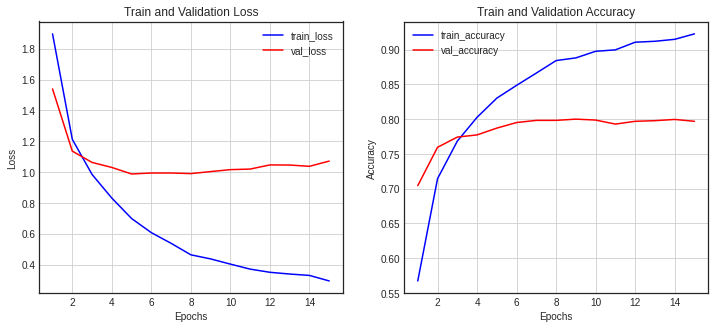

In [20]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [19]:
# 테스트 데이터셋 평가
test_loss, test_accuracy = reuters_model.evaluate(x_test, y_test)

# 결과 출력
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

71/71 [==============================] - 0s 3ms/step - loss: 0.9775 - accuracy: 0.7836
Test Loss: 0.9775165319442749
Test Accuracy: 0.7836152911186218


# CIFAR-10 데이터 분류 프로젝트

In [22]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [23]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

170508288/170498071 [==============================] - 3s 0us/step
전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [24]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

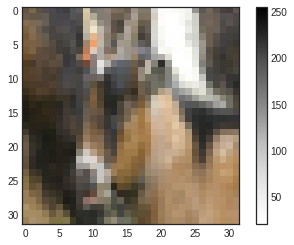

In [25]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [27]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train = x_train.reshape(-1, 32 * 32 * 3)
x_val = x_val.reshape(-1, 32 * 32 * 3)
x_test = x_test.reshape(-1, 32 * 32 * 3)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [29]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
# [[YOUR CODE]]
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout

cifar10_model = Sequential()
cifar10_model.add(Dense(256, activation='relu', input_shape=(32 * 32 * 3,)))
cifar10_model.add(BatchNormalization())
cifar10_model.add(Dropout(0.5))
cifar10_model.add(Dense(128, activation='relu'))
cifar10_model.add(BatchNormalization())
cifar10_model.add(Dropout(0.5))
cifar10_model.add(Dense(64, activation='relu'))
cifar10_model.add(BatchNormalization())
cifar10_model.add(Dropout(0.5))
cifar10_model.add(Dense(10, activation='softmax'))

cifar10_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [31]:
cifar10_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 256)               786688    
_________________________________________________________________
batch_normalization_8 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_9 (Batch (None, 128)               512       
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)               

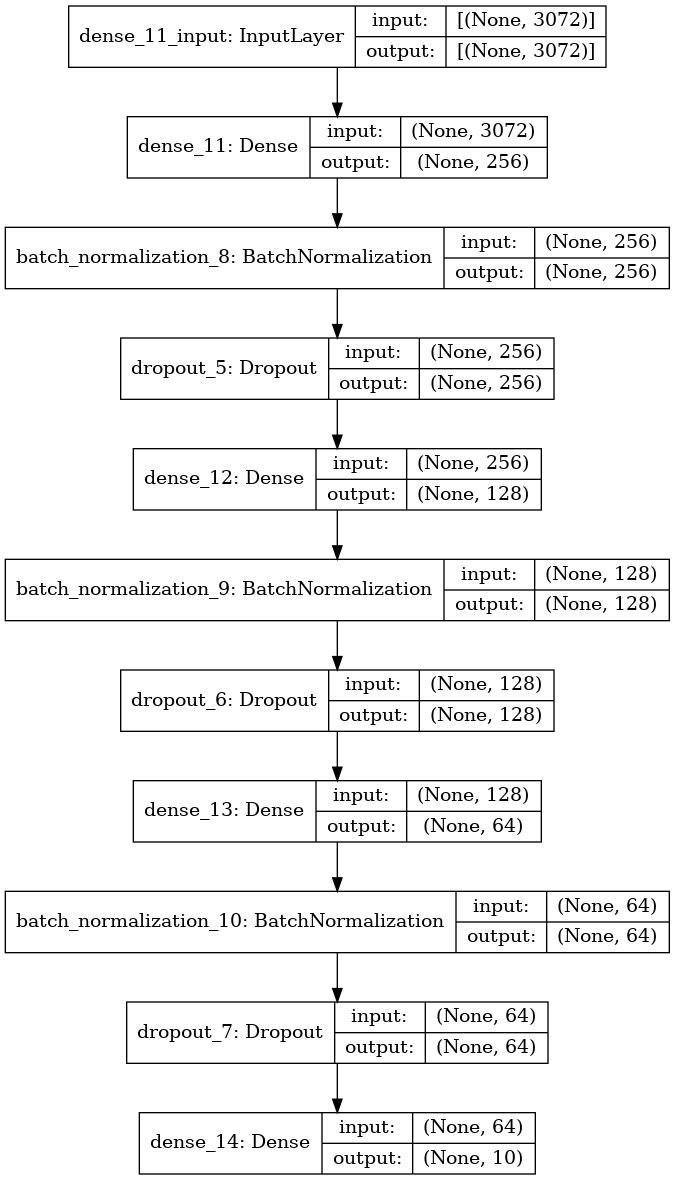

In [32]:
utils.plot_model(cifar10_model, show_shapes=True)

In [33]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
# [[YOUR CODE]]
check_point_cb = callbacks.ModelCheckpoint('best_model_cifar10.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = cifar10_model.fit(x_train, y_train, epochs=30,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/30
1250/1250 [==============================] - 6s 4ms/step - loss: 2.2402 - accuracy: 0.2264 - val_loss: 1.8633 - val_accuracy: 0.3307
Epoch 2/30
1250/1250 [==============================] - 4s 4ms/step - loss: 1.9289 - accuracy: 0.2965 - val_loss: 1.8245 - val_accuracy: 0.3419
Epoch 3/30
1250/1250 [==============================] - 4s 3ms/step - loss: 1.8837 - accuracy: 0.3167 - val_loss: 1.7474 - val_accuracy: 0.3686
Epoch 4/30
1250/1250 [==============================] - 4s 4ms/step - loss: 1.8597 - accuracy: 0.3315 - val_loss: 1.7524 - val_accuracy: 0.3655
Epoch 5/30
1250/1250 [==============================] - 4s 4ms/step - loss: 1.8412 - accuracy: 0.3345 - val_loss: 1.7419 - val_accuracy: 0.3626
Epoch 6/30
1250/1250 [==============================] - 4s 3ms/step - loss: 1.8356 - accuracy: 0.3402 - val_loss: 1.6978 - val_accuracy: 0.3879
Epoch 7/30
1250/1250 [==============================] - 4s 4ms/step - loss: 1.8209 - accuracy: 0.3459 - val_loss: 1.7099 - val_accuracy:

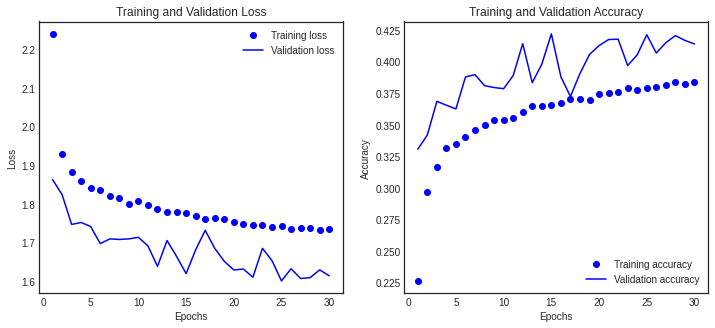

In [34]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
import matplotlib.pyplot as plt

# 모델 학습 히스토리에서 loss, val_loss, accuracy, val_accuracy를 가져옵니다.
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Epochs의 수를 가져옵니다.
epochs = range(1, len(loss) + 1)

# Loss 차트를 그립니다.
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy 차트를 그립니다.
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# 차트를 보여줍니다.
plt.show()


In [35]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
cifar10_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.6007 - accuracy: 0.4212


[1.6007331609725952, 0.4212000072002411]